<a href="https://colab.research.google.com/github/Ajith-Niraparambil/Python_Machine-Learning-Project/blob/main/Customer_Analysis02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix



Data collection and Preprocessing

In [ ]:
# Importing the dataset

customers_data = pd.read_csv('/content/customer_train.csv')

In [ ]:
# printing first five rows

customers_data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(customers_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     168

In [ ]:
# Explore the dataset visually and statistically
print("\nDescriptive Statistics:")
print(customers_data.describe())


Descriptive Statistics:
       Unnamed: 0.1   Unnamed: 0            ID   Year_Birth        Income  \
count   1680.000000  1680.000000   1680.000000  1680.000000  1.663000e+03   
mean     839.500000   839.500000   5551.728571  1968.847619  5.201434e+07   
std      485.118542   485.118542   3238.155703    12.027192  2.148248e+07   
min        0.000000     0.000000      0.000000  1893.000000  1.730000e+06   
25%      419.750000   419.750000   2823.250000  1960.000000  3.568800e+07   
50%      839.500000   839.500000   5381.000000  1970.000000  5.125000e+07   
75%     1259.250000  1259.250000   8370.750000  1977.000000  6.812200e+07   
max     1679.000000  1679.000000  11191.000000  1996.000000  1.623970e+08   

           Kidhome     Teenhome      Recency       MntCoke      MntFruits  \
count  1680.000000  1680.000000  1680.000000  1.680000e+03    1680.000000   
mean      0.452381     0.500000    49.083333  3.048994e+05   25918.452381   
std       0.546901     0.550055    28.930637  3.38

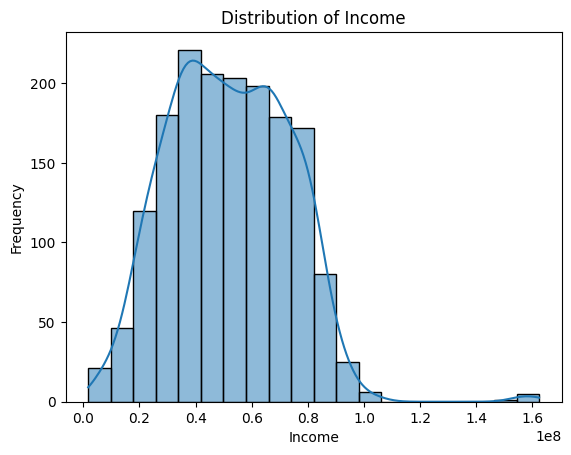

In [ ]:
# Visualize numerical variables
sns.histplot(customers_data['Income'], bins=20, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

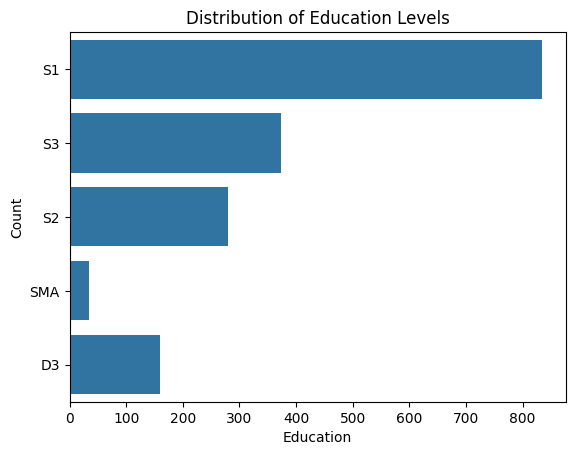

In [ ]:
# Analyze categorical variables
sns.countplot(customers_data['Education'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

In [ ]:
# Calculate variance for numerical columns
variances = customers_data.var()

<ipython-input-10-b7e7f9a5ed6c>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = customers_data.var()


In [ ]:
# Display columns with low variance (e.g., less than a threshold)
low_variance_cols = variances[variances < 0.1].index
print("\nColumns with Low Variance:")
print(low_variance_cols)


Columns with Low Variance:
Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue'],
      dtype='object')


In [ ]:
# List of unwanted columns


unwanted_columns = ['Unnamed: 0.1','Unnamed: 0','AcceptedCmp3', 'AcceptedCmp4',
                    'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain',
                    'Z_CostContact', 'Z_Revenue','Dt_Customer']

In [ ]:
# Dropping unwanted columns
customers_data.drop(columns=unwanted_columns, inplace=True)

In [ ]:
customers_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,1
1,2174,1954,S1,Lajang,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0
4,5324,1981,S3,Menikah,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0


In [ ]:
#Creating a loop to get the distribution plot for all columns
for column in customers_data:
  sns.displot(x=column,data=customers_data)

In [ ]:
# Calculate correlation matrix
correlation_matrix = customers_data.corr()

<ipython-input-16-da41e5b2a6b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customers_data.corr()


In [ ]:
# Display correlation with the target(Response) column
target_correlation = correlation_matrix['Response'].sort_values(ascending=False)
print("\nCorrelation with Target Column (Response):")
print(target_correlation)


Correlation with Target Column (Response):
Response               1.000000
MntCoke                0.229227
MntMeatProducts        0.206919
NumCatalogPurchases    0.204002
Income                 0.141382
NumWebPurchases        0.137041
MntGoldProds           0.135610
MntFruits              0.122707
MntSweetProducts       0.115916
MntFishProducts        0.112854
Year_Birth             0.025360
NumStorePurchases      0.015670
NumWebVisitsMonth     -0.007876
NumDealsPurchases     -0.008593
ID                    -0.010782
Kidhome               -0.069688
Teenhome              -0.147971
Recency               -0.178541
Name: Response, dtype: float64


In [ ]:
# Create a new feature 'TotalAmountSpent' by summing the amounts spent on all product categories
customers_data['TotalAmountSpent'] = customers_data[['MntCoke','MntMeatProducts','MntFruits',
                                                     'MntFishProducts','MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [ ]:
#Setting the columns position



customers_data = customers_data[['ID',	'Year_Birth',	'Education',	'Marital_Status',	'Income',	'Kidhome',	'Teenhome','Recency','NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth','TotalAmountSpent','Response']]


In [ ]:
customers_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAmountSpent,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,58,3,8,10,4,7,1617000,1
1,2174,1954,S1,Lajang,46344000.0,1,1,38,2,1,1,2,5,27000,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,26,1,8,2,10,4,776000,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,26,2,2,0,4,6,53000,0
4,5324,1981,S3,Menikah,58293000.0,1,0,94,5,5,3,6,5,422000,0


<Axes: xlabel='Education', ylabel='count'>

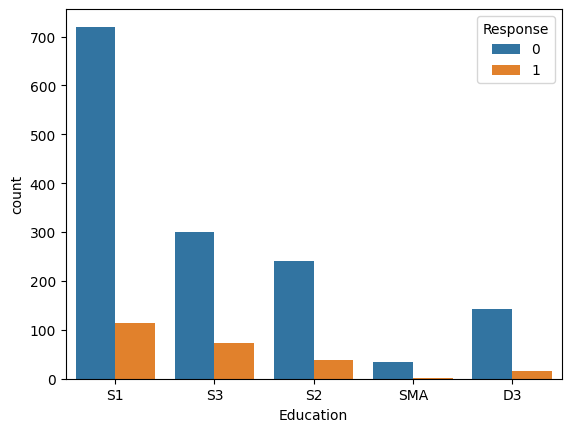

In [ ]:
#Data visualisation Education & Response

sns.countplot(x='Education',hue='Response',data=customers_data)

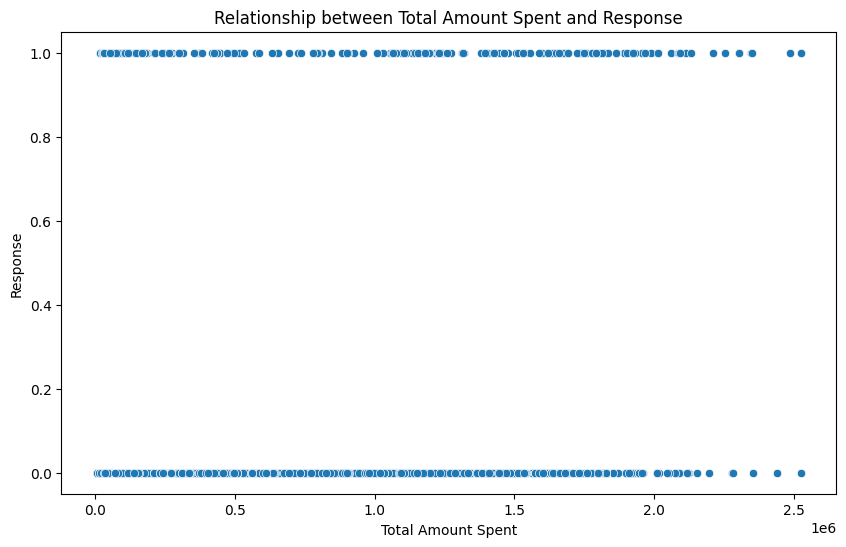

In [ ]:
# Visualize the relationship between 'TotalAmountSpent' and 'Response' using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmountSpent', y='Response', data=customers_data)
plt.title('Relationship between Total Amount Spent and Response')
plt.xlabel('Total Amount Spent')
plt.ylabel('Response')
plt.show()

In [ ]:
# Checking no. rows and columns

customers_data.shape

(1680, 15)

In [ ]:
# Number of missing values in each column

customers_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Recency                 0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
TotalAmountSpent        0
Response                0
dtype: int64

In [ ]:
# Dropping the missing values

customers_data = customers_data.dropna()

In [ ]:
customers_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
TotalAmountSpent       0
Response               0
dtype: int64

In [ ]:
customers_data['Response'].value_counts()

0    1421
1     242
Name: Response, dtype: int64

Inbalanced case

1----> The customer will accept the campaign

0----> The customer did not accept the campaign





In [ ]:
# Encoding the dataset

# Initialize the LabelEncoder

label_encoder = LabelEncoder()

In [ ]:
customers_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAmountSpent,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,58,3,8,10,4,7,1617000,1
1,2174,1954,S1,Lajang,46344000.0,1,1,38,2,1,1,2,5,27000,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,26,1,8,2,10,4,776000,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,26,2,2,0,4,6,53000,0
4,5324,1981,S3,Menikah,58293000.0,1,0,94,5,5,3,6,5,422000,0


In [ ]:
# Identify columns by data type
string_columns = customers_data.select_dtypes(include=['object']).columns

In [ ]:
for column in string_columns:
    customers_data[column] = label_encoder.fit_transform(customers_data[column])

In [ ]:
customers_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAmountSpent,Response
0,5524,1957,1,4,58138000.0,0,0,58,3,8,10,4,7,1617000,1
1,2174,1954,1,4,46344000.0,1,1,38,2,1,1,2,5,27000,0
2,4141,1965,1,0,71613000.0,0,0,26,1,8,2,10,4,776000,0
3,6182,1984,1,0,26646000.0,1,0,26,2,2,0,4,6,53000,0
4,5324,1981,3,5,58293000.0,1,0,94,5,5,3,6,5,422000,0


In [ ]:
# Define features (Income,Kidhome,Teenhome and Income) and target (Response)
X = customers_data[['Income','Kidhome','Teenhome','TotalAmountSpent']]
y = customers_data['Response']

In [ ]:
print(X)

          Income  Kidhome  Teenhome  TotalAmountSpent
0     58138000.0        0         0           1617000
1     46344000.0        1         1             27000
2     71613000.0        0         0            776000
3     26646000.0        1         0             53000
4     58293000.0        1         0            422000
...          ...      ...       ...               ...
1675  20193000.0        0         0             82000
1676  27573000.0        1         0            244000
1677  15862000.0        1         0             36000
1678  49544000.0        1         0            404000
1679  33228000.0        1         0             71000

[1663 rows x 4 columns]


In [ ]:
print(y)

0       1
1       0
2       0
3       0
4       0
       ..
1675    0
1676    0
1677    0
1678    0
1679    0
Name: Response, Length: 1663, dtype: int64


Train Test Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1663, 4) (1330, 4) (333, 4)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

print(X_test_scaled)

[[-0.3062261   0.99128469  0.87112464 -0.63855249]
 [ 1.23395564 -0.8322404  -0.92514787  0.36738894]
 [ 1.34873276 -0.8322404  -0.92514787  1.05636707]
 ...
 [-0.43877364  0.99128469  0.87112464 -0.69360401]
 [ 0.62000408 -0.8322404  -0.92514787  1.5718495 ]
 [-0.09547927 -0.8322404   0.87112464 -0.4717297 ]]
[[-0.10500082 -0.8322404   0.87112464  0.3290197 ]
 [ 1.26294452 -0.8322404  -0.92514787  0.63430541]
 [ 1.42688491 -0.8322404   0.87112464  1.65192444]
 ...
 [-1.42491418  0.99128469 -0.92514787 -0.84541275]
 [ 0.01745953 -0.8322404   0.87112464 -0.79870237]
 [ 1.70008746 -0.8322404   0.87112464  2.26750054]]


Initialize and train the KNeighborsClassifier Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8498498498498499


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[275   9]
 [ 41   8]]


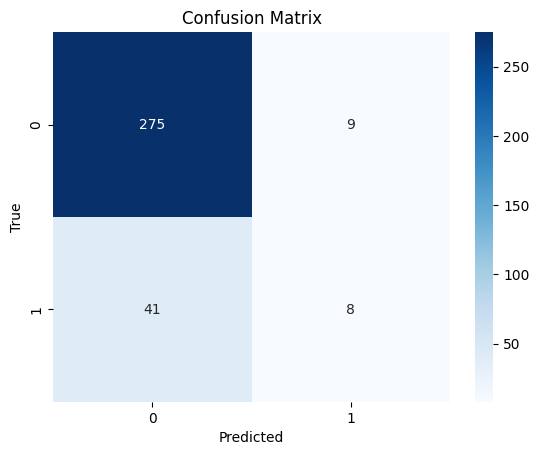

In [ ]:
# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Build a predictive system

In [ ]:
new_data = [[46344000,1,1,27000]]

# Standardize the new data using the same scaler object used for training
new_data_scaled = scaler.transform(new_data)

# Predict the response for the new data point
predicted_response = knn.predict(new_data_scaled)

# Print the predicted response
print("Predicted Response:", predicted_response)

Predicted Response: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
